## Matrics Regression:
## R^2
## adj R^2
## m s Σ
## m A Σ
## R m s Σ
## Logistic Regression:
## helps to solve the classifer
## y/Dv->categorial n
## ranging from 0 to 1
## threshold 0.5
## >=0.5->class P
## <0.5 ->class F
## matrics of classifer:
## true positive
## true -ve
## false +ve
## false -ve
## confusion matrics
##  a-> actual ,p-> predicted
## accuracy=tp+tn/tp+tn+fp+fn
## recall=tp/ap,ap=tp/tp+fn
## precision=tp/pp,pp=tp/tp+fp

In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [83]:
df=pd.read_csv('https://raw.githubusercontent.com/Premalatha-success/HHE_MA_July31_Batch/main/titanic-training-data.csv')

In [84]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [85]:
df.shape

(891, 12)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [87]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [88]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

 ## Analyse the data

<AxesSubplot:xlabel='Survived', ylabel='count'>

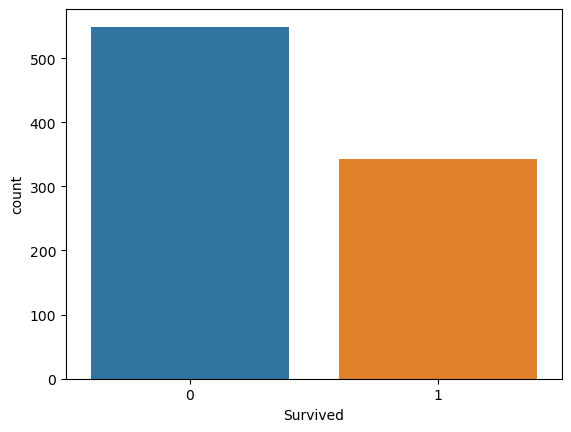

In [89]:
sns.countplot(x="Survived",data=df)

In [90]:
pd.crosstab(df["Survived"],df["Sex"])

Sex,female,male
Survived,,
0,81,468
1,233,109


<AxesSubplot:xlabel='Survived', ylabel='count'>

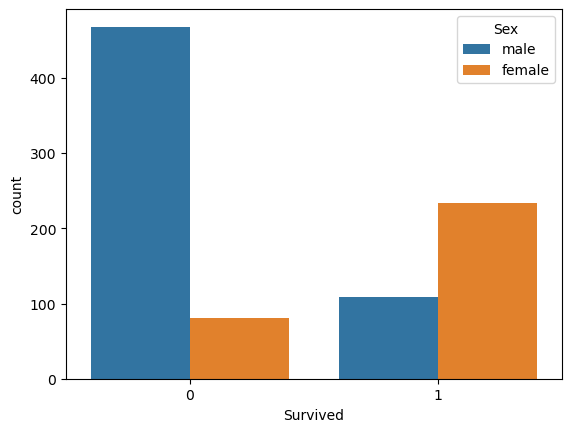

In [91]:
sns.countplot(x="Survived",hue="Sex",data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

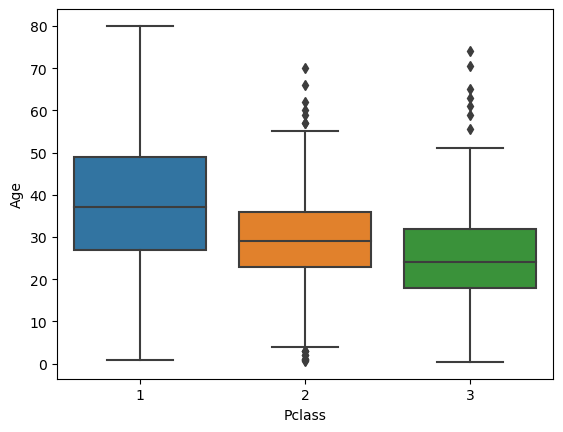

In [92]:
sns.boxplot(x="Pclass",y="Age",data=df)

In [93]:
df.drop("Cabin",axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [94]:
df.dropna(inplace=True)

In [95]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [96]:
dummies=pd.get_dummies(df[["Pclass","Embarked","Sex"]],drop_first=True )

In [97]:
df=pd.concat([df,dummies],axis=1)

In [98]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Pclass,Embarked_Q,Embarked_S,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,3,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,3,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,3,0,1,1


In [99]:
df=df.drop(["Embarked","Sex","Name","PassengerId","Ticket","Fare"],axis=1)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    712 non-null    int64  
 1   Pclass      712 non-null    int64  
 2   Age         712 non-null    float64
 3   SibSp       712 non-null    int64  
 4   Parch       712 non-null    int64  
 5   Pclass      712 non-null    int64  
 6   Embarked_Q  712 non-null    uint8  
 7   Embarked_S  712 non-null    uint8  
 8   Sex_male    712 non-null    uint8  
dtypes: float64(1), int64(5), uint8(3)
memory usage: 41.0 KB


In [101]:
X=df.drop("Survived",axis=1)
y=df["Survived"]

In [102]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [103]:
model=LogisticRegression()

In [104]:
model.fit(X_train,y_train)

LogisticRegression()

In [105]:
model.score(X_test,y_test)

0.794392523364486

In [106]:
model.score(X_train,y_train)

0.8092369477911646

In [107]:
predictions=model.predict(X_test)

In [109]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.794392523364486

In [110]:
from sklearn.metrics import confusion_matrix

In [111]:
confusion_matrix(y_test,predictions)

array([[104,  22],
       [ 22,  66]], dtype=int64)

In [112]:
from sklearn import metrics

<AxesSubplot:>

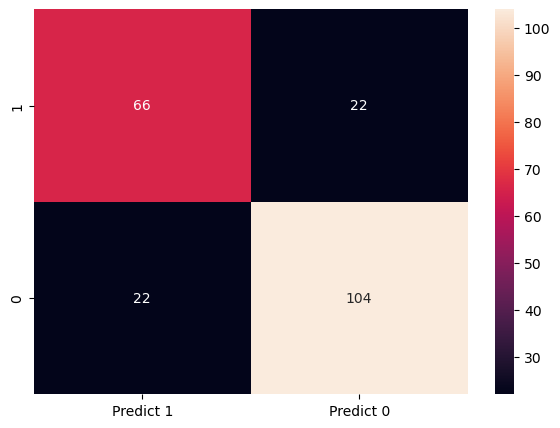

In [113]:
cm=metrics.confusion_matrix(y_test,predictions,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in["1","0"]],
                  columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [114]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       126
           1       0.75      0.75      0.75        88

    accuracy                           0.79       214
   macro avg       0.79      0.79      0.79       214
weighted avg       0.79      0.79      0.79       214

